# Customer Churn Analytics
Customer churn from a IMB Sample Data Set.
https://www.ibm.com/communities/analytics/watson-analytics-blog/guide-to-sample-datasets/

In [1]:
# Loading packages
library(plyr)
library(corrplot)
library(ggplot2)
library(gridExtra)
library(caret)
library(MASS)
library(randomForest)
library(party)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
corrplot 0.84 loaded
Loading required package: lattice
randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.

Attaching package: ‘randomForest’

The following object is masked from ‘package:gridExtra’:

    combine

The following object is masked from ‘package:ggplot2’:

    margin

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Loading required package: grid
Loading required package: mvtnorm
Loading required package: modeltools
Loading required package: stats4

Attaching package: ‘modeltools’

The following object is masked from ‘package:plyr’:

    empty

Loading required package: strucchange
Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Loading required package: sandwich


## Loading and cleaning data

In [2]:
churn = read.csv('../../../../datasets/business/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
head(churn)

customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,⋯,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,⋯,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,⋯,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,⋯,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,⋯,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,⋯,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,⋯,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes


In [4]:
str(churn)

'data.frame':	7043 obs. of  21 variables:
 $ customerID      : Factor w/ 7043 levels "0002-ORFBO","0003-MKNFE",..: 5376 3963 2565 5536 6512 6552 1003 4771 5605 4535 ...
 $ gender          : Factor w/ 2 levels "Female","Male": 1 2 2 2 1 1 2 1 1 2 ...
 $ SeniorCitizen   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Partner         : Factor w/ 2 levels "No","Yes": 2 1 1 1 1 1 1 1 2 1 ...
 $ Dependents      : Factor w/ 2 levels "No","Yes": 1 1 1 1 1 1 2 1 1 2 ...
 $ tenure          : int  1 34 2 45 2 8 22 10 28 62 ...
 $ PhoneService    : Factor w/ 2 levels "No","Yes": 1 2 2 1 2 2 2 1 2 2 ...
 $ MultipleLines   : Factor w/ 3 levels "No","No phone service",..: 2 1 1 2 1 3 3 2 3 1 ...
 $ InternetService : Factor w/ 3 levels "DSL","Fiber optic",..: 1 1 1 1 2 2 2 1 2 1 ...
 $ OnlineSecurity  : Factor w/ 3 levels "No","No internet service",..: 1 3 3 3 1 1 1 3 1 3 ...
 $ OnlineBackup    : Factor w/ 3 levels "No","No internet service",..: 3 1 3 1 1 1 3 1 1 3 ...
 $ DeviceProtection: Factor w/ 3 levels "No","

#### Search for missing data in each column and treat them

In [5]:
sapply(churn, function(x) sum(is.na(x)))

customerID           gender    SeniorCitizen          Partner 
               0                0                0                0 
      Dependents           tenure     PhoneService    MultipleLines 
               0                0                0                0 
 InternetService   OnlineSecurity     OnlineBackup DeviceProtection 
               0                0                0                0 
     TechSupport      StreamingTV  StreamingMovies         Contract 
               0                0                0                0 
PaperlessBilling    PaymentMethod   MonthlyCharges     TotalCharges 
               0                0                0               11 
           Churn 
               0

In [6]:
#?complete

In [7]:
churn = churn[complete.cases(churn),]

In [8]:
sapply(churn, function(x) sum(is.na(x)))

customerID           gender    SeniorCitizen          Partner 
               0                0                0                0 
      Dependents           tenure     PhoneService    MultipleLines 
               0                0                0                0 
 InternetService   OnlineSecurity     OnlineBackup DeviceProtection 
               0                0                0                0 
     TechSupport      StreamingTV  StreamingMovies         Contract 
               0                0                0                0 
PaperlessBilling    PaymentMethod   MonthlyCharges     TotalCharges 
               0                0                0                0 
           Churn 
               0

In [9]:
str(churn)

'data.frame':	7032 obs. of  21 variables:
 $ customerID      : Factor w/ 7043 levels "0002-ORFBO","0003-MKNFE",..: 5376 3963 2565 5536 6512 6552 1003 4771 5605 4535 ...
 $ gender          : Factor w/ 2 levels "Female","Male": 1 2 2 2 1 1 2 1 1 2 ...
 $ SeniorCitizen   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Partner         : Factor w/ 2 levels "No","Yes": 2 1 1 1 1 1 1 1 2 1 ...
 $ Dependents      : Factor w/ 2 levels "No","Yes": 1 1 1 1 1 1 2 1 1 2 ...
 $ tenure          : int  1 34 2 45 2 8 22 10 28 62 ...
 $ PhoneService    : Factor w/ 2 levels "No","Yes": 1 2 2 1 2 2 2 1 2 2 ...
 $ MultipleLines   : Factor w/ 3 levels "No","No phone service",..: 2 1 1 2 1 3 3 2 3 1 ...
 $ InternetService : Factor w/ 3 levels "DSL","Fiber optic",..: 1 1 1 1 2 2 2 1 2 1 ...
 $ OnlineSecurity  : Factor w/ 3 levels "No","No internet service",..: 1 3 3 3 1 1 1 3 1 3 ...
 $ OnlineBackup    : Factor w/ 3 levels "No","No internet service",..: 3 1 3 1 1 1 3 1 1 3 ...
 $ DeviceProtection: Factor w/ 3 levels "No","

In [10]:
cols_record1 = c(10:15)
for(i in 1:ncol(churn[, cols_record1])) {
    churn[, cols_record1][, i] <- as.factor(mapvalues(churn[,cols_record1][, i], from = c("No internet service"), to = c("No")))
}

In [11]:
churn$MultipleLines = as.factor(mapvalues(churn$MultipleLines, from = c("No phone service"), to = c("No")))

#### Groupping tenure (time of contract) in 1-12 Months, 13-24 Months and so on

In [12]:
min(churn$tenure); max(churn$tenure)

[1] 1

[1] 72

In [13]:
group_tenure = function(tenure) {
    if (tenure >= 0 & tenure <= 12) {
        return('0-12 Months')
    } else if (tenure > 12 & tenure <= 24) {
        return('13-24 Months')
    } else if (tenure > 24 & tenure <= 36) {
        return('25-36 Months')
    } else if (tenure > 36 & tenure <= 48) {
        return('37-48 Months')
    } else if (tenure > 48 & tenure <= 60) {
        return('49-60 Months')
    } else if (tenure > 60) {
        return('> 60 Months')
    }
}

In [14]:
churn$tenure_group = sapply(churn$tenure, group_tenure)
churn$tenure_group = as.factor(churn$tenure_group)

#### Alter the value of the column Senior Citizen from 0 or 1 to "No" or "Yes"

In [15]:
churn$SeniorCitizen = as.factor(mapvalues(churn$SeniorCitizen, from = c("0", "1"), to = c("No", "Yes")))

#### Remove the unnecessary columns

In [16]:
churn$customerID = NULL
churn$tenure = NULL

In [17]:
head(churn)

gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
Female,No,Yes,No,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0-12 Months
Male,No,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25-36 Months
Male,No,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0-12 Months
Male,No,No,No,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37-48 Months
Female,No,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0-12 Months
Female,No,No,No,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,0-12 Months


# Starting the Exploratory Analysis
#### Selecting variables

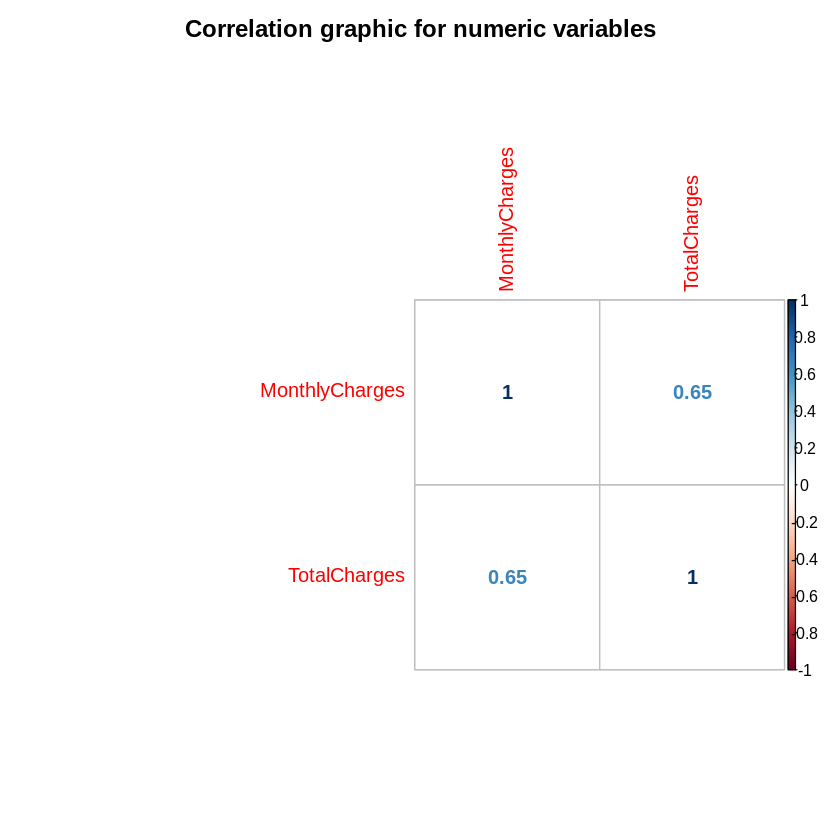

In [18]:
numeric.var = sapply(churn, is.numeric)
corr.matrix = cor(churn[, numeric.var])
corrplot(corr.matrix, main = "\n\nCorrelation graphic for numeric variables", method = "number")

#### MonthlyCharges and TotalCharges has a high colinearity, so we remove one of them

In [19]:
churn$TotalCharges = NULL

In [20]:
p1 = ggplot(churn, aes(x = gender)) +
     ggtitle("Gender") +
     xlab("Sex") +
     geom_bar(aes(y = 100 * (..count..)/sum(..count..)), width = 0.5) +
     ylab("Percentual") +
     coord_flip() +
     theme_minimal()

In [21]:
p2 = ggplot(churn, aes(x = SeniorCitizen)) +
     ggtitle("Senior Citizen") +
     xlab("Senior Citizen") +
     geom_bar(aes(y = 100 * (..count..)/sum(..count..)), width = 0.5) +
     ylab("Percentual") +
     coord_flip() + 
     theme_minimal()

In [22]:
p3 = ggplot(churn, aes(x = Partner)) +
     ggtitle("Partner") +
     xlab("Partner") +
     geom_bar(aes(y = 100 * (..count..)/sum(..count..)), width = 0.5) +
     ylab("Percentual") +
     coord_flip() + 
     theme_minimal()

In [23]:
p4 = ggplot(churn, aes(x = Dependents)) +
     ggtitle("Dependents") +
     xlab("Dependents") +
     geom_bar(aes(y = 100 * (..count..)/sum(..count..)), width = 0.5) +
     ylab("Percentual") +
     coord_flip() + 
     theme_minimal()

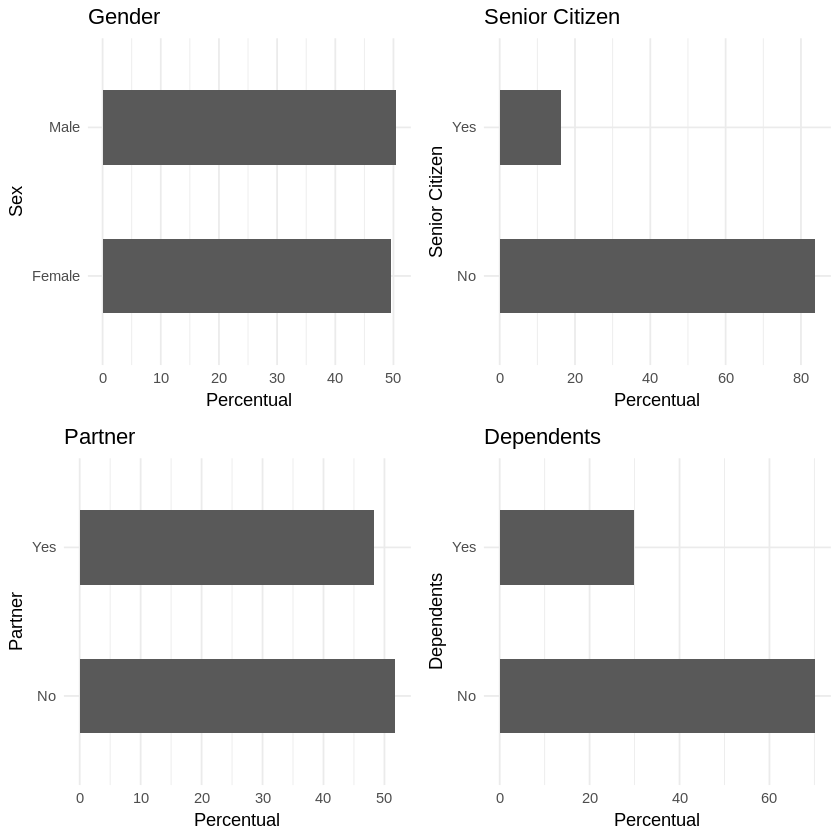

In [24]:
grid.arrange(p1, p2, p3, p4, ncol = 2)

In [25]:
p5 = ggplot(churn, aes(x = PhoneService)) +
     ggtitle("Phone Service") +
     xlab("Phone Service") +
     geom_bar(aes(y = 100 * (..count..)/sum(..count..)), width = 0.5) +
     ylab("Percentual") +
     coord_flip() + 
     theme_minimal()

In [26]:
p6 = ggplot(churn, aes(x = MultipleLines)) +
     ggtitle("Multiple Lines") +
     xlab("Multiple Lines") +
     geom_bar(aes(y = 100 * (..count..)/sum(..count..)), width = 0.5) +
     ylab("Percentual") +
     coord_flip() + 
     theme_minimal()

In [27]:
p7 = ggplot(churn, aes(x = InternetService)) +
     ggtitle("Internet Service") +
     xlab("Internet Service") +
     geom_bar(aes(y = 100 * (..count..)/sum(..count..)), width = 0.5) +
     ylab("Percentual") +
     coord_flip() + 
     theme_minimal()

In [28]:
p8 = ggplot(churn, aes(x = OnlineSecurity)) +
     ggtitle("Online Security") +
     xlab("Online Security") +
     geom_bar(aes(y = 100 * (..count..)/sum(..count..)), width = 0.5) +
     ylab("Percentual") +
     coord_flip() + 
     theme_minimal()

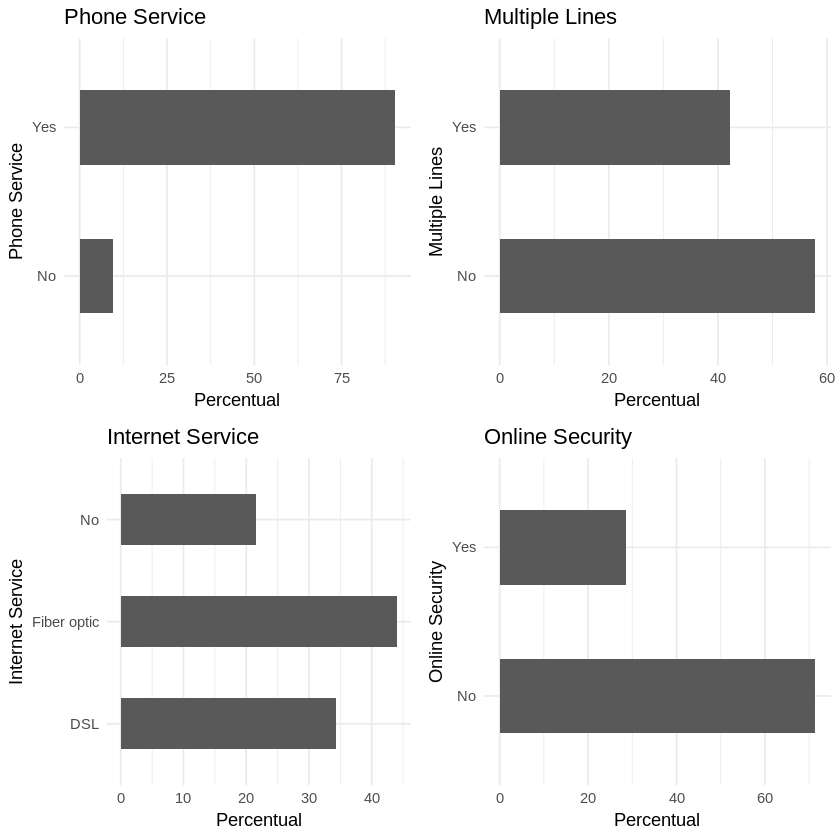

In [29]:
grid.arrange(p5, p6, p7, p8, ncol = 2)

In [30]:
p9 = ggplot(churn, aes(x = OnlineBackup)) +
     ggtitle("Online Backup") +
     xlab("Online Backup") +
     geom_bar(aes(y = 100 * (..count..)/sum(..count..)), width = 0.5) +
     ylab("Percentual") +
     coord_flip() + 
     theme_minimal()

In [31]:
p10 = ggplot(churn, aes(x = DeviceProtection)) +
     ggtitle("Device Protection") +
     xlab("Device Protection") +
     geom_bar(aes(y = 100 * (..count..)/sum(..count..)), width = 0.5) +
     ylab("Percentual") +
     coord_flip() + 
     theme_minimal()

In [32]:
p11 = ggplot(churn, aes(x = TechSupport)) +
     ggtitle("Tech Support") +
     xlab("Tech Support") +
     geom_bar(aes(y = 100 * (..count..)/sum(..count..)), width = 0.5) +
     ylab("Percentual") +
     coord_flip() + 
     theme_minimal()

In [33]:
p12 = ggplot(churn, aes(x = StreamingTV)) +
     ggtitle("Streaming TV") +
     xlab("Streaming TV") +
     geom_bar(aes(y = 100 * (..count..)/sum(..count..)), width = 0.5) +
     ylab("Percentual") +
     coord_flip() + 
     theme_minimal()

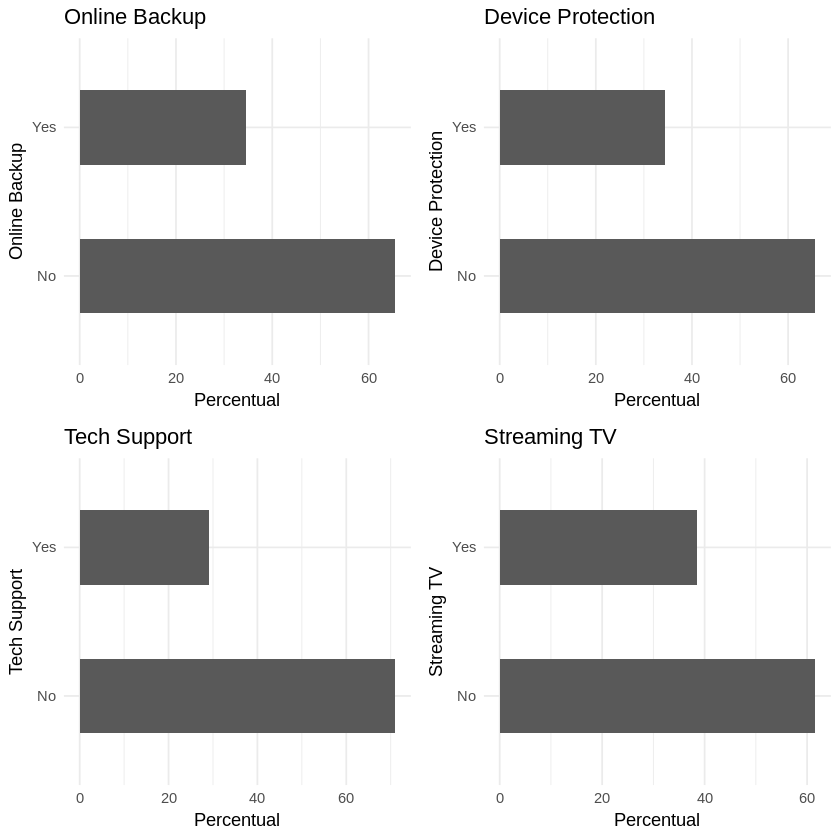

In [34]:
grid.arrange(p9, p10, p11, p12, ncol = 2)

In [35]:
p13 = ggplot(churn, aes(x = StreamingMovies)) +
     ggtitle("Streaming Movies") +
     xlab("Streaming Movies") +
     geom_bar(aes(y = 100 * (..count..)/sum(..count..)), width = 0.5) +
     ylab("Percentual") +
     coord_flip() + 
     theme_minimal()

In [36]:
p14 = ggplot(churn, aes(x = Contract)) +
     ggtitle("Contract") +
     xlab("Contract") +
     geom_bar(aes(y = 100 * (..count..)/sum(..count..)), width = 0.5) +
     ylab("Percentual") +
     coord_flip() + 
     theme_minimal()

In [37]:
p15 = ggplot(churn, aes(x = PaperlessBilling)) +
     ggtitle("Paperless Billing") +
     xlab("Paperless Billing") +
     geom_bar(aes(y = 100 * (..count..)/sum(..count..)), width = 0.5) +
     ylab("Percentual") +
     coord_flip() + 
     theme_minimal()

In [38]:
p16 = ggplot(churn, aes(x = PaymentMethod)) +
     ggtitle("Payment Method") +
     xlab("Payment Method") +
     geom_bar(aes(y = 100 * (..count..)/sum(..count..)), width = 0.5) +
     ylab("Percentual") +
     coord_flip() + 
     theme_minimal()

In [39]:
p17 = ggplot(churn, aes(x = tenure_group)) +
     ggtitle("Tenure Group") +
     xlab("Tenure Group") +
     geom_bar(aes(y = 100 * (..count..)/sum(..count..)), width = 0.5) +
     ylab("Percentual") +
     coord_flip() + 
     theme_minimal()

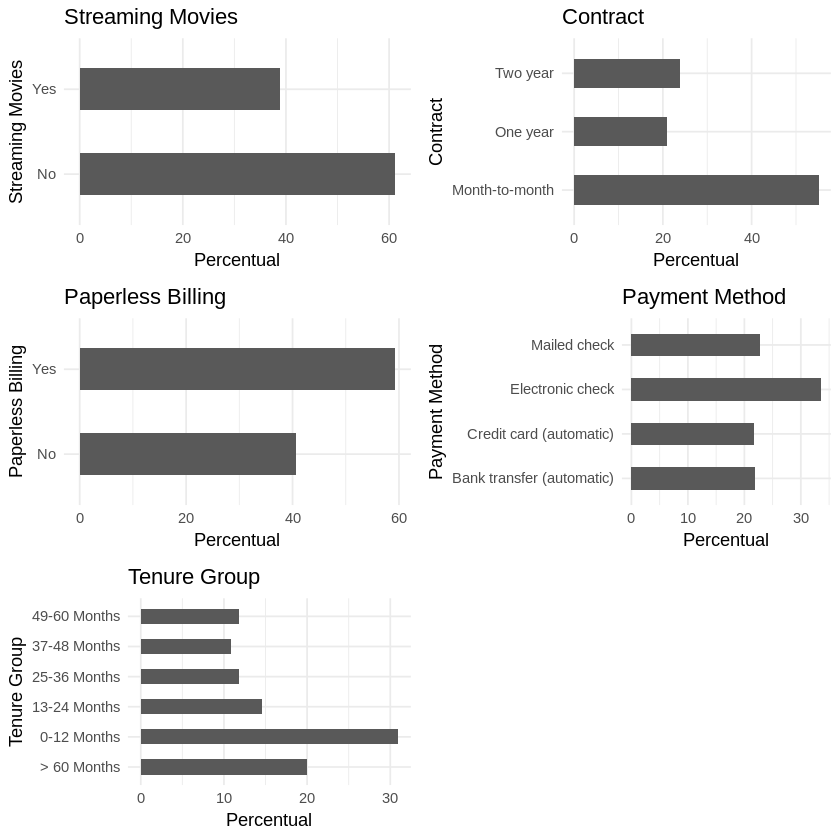

In [40]:
grid.arrange(p13, p14, p15, p16, p17, ncol = 2)

# Machine Learning
### Predictive model
#### Logistic Regression

In [41]:
# Test, train, split
intrain = createDataPartition(churn$Churn, p = 0.7, list = F)
set.seed(2017)
training = churn[intrain,]
testing = churn[-intrain,]

In [42]:
dim(training); dim(testing)

[1] 4924   19

[1] 2108   19

In [43]:
#?glm

### Logistic Regression model training
#### Fitting

In [44]:
LogModel = glm(Churn ~ ., family = binomial(link = "logit"), data = training)
print(summary(LogModel))


Call:
glm(formula = Churn ~ ., family = binomial(link = "logit"), data = training)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.9545  -0.6676  -0.2932   0.6883   3.0272  

Coefficients:
                                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)                          -1.188693   1.007599  -1.180 0.238108    
genderMale                            0.037159   0.077605   0.479 0.632062    
SeniorCitizenYes                      0.167547   0.101638   1.648 0.099256 .  
PartnerYes                           -0.016289   0.092373  -0.176 0.860025    
DependentsYes                        -0.159206   0.107468  -1.481 0.138495    
PhoneServiceYes                       0.017119   0.789358   0.022 0.982698    
MultipleLinesYes                      0.374471   0.215355   1.739 0.082060 .  
InternetServiceFiber optic            1.617113   0.972365   1.663 0.096298 .  
InternetServiceNo                    -1.468069   0.982061  -1.495 0.134944  

#### Variance analysis

In [45]:
#?anova

In [46]:
anova(LogModel, test = "Chisq")

,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,4923,5702.760,NA
gender,1,0.05705828,4922,5702.703,8.112074e-01
SeniorCitizen,1,94.47805566,4921,5608.225,2.478246e-22
Partner,1,121.70644326,4920,5486.518,2.676499e-28
Dependents,1,39.01000794,4919,5447.508,4.216385e-10
PhoneService,1,0.89224349,4918,5446.616,3.448701e-01
MultipleLines,1,5.11818180,4917,5441.498,2.367641e-02
InternetService,2,476.07626594,4915,4965.421,4.181695e-104
OnlineSecurity,1,167.11070180,4914,4798.311,3.164092e-38
OnlineBackup,1,70.26884870,4913,4728.042,5.174846e-17


In [47]:
testing$Churn = as.character(testing$Churn)
testing$Churn[testing$Churn == "No"] = 0
testing$Churn[testing$Churn == "Yes"] = 1
fitted.results = predict(LogModel, newdata = testing, type="response")
fitted.results = ifelse(fitted.results > 0.5, 1, 0)
misClassificError = mean(fitted.results != testing$Churn)
print(paste('Logistic Regression Accuracy', 1 - misClassificError))

[1] "Logistic Regression Accuracy 0.806925996204934"


In [48]:
print('Confusion Matrix')
table(testing$Churn, fitted.results > 0.5)

[1] "Confusion Matrix"


   
    FALSE TRUE
  0  1421  127
  1   280  280

In [49]:
print('Odds Ratio')
exp(cbind(OR=coef(LogModel), confint(LogModel)))

[1] "Odds Ratio"


Waiting for profiling to be done...


,OR,2.5 %,97.5 %
(Intercept),0.3046191,0.04220406,2.1936656
genderMale,1.0378583,0.89142118,1.2084366
SeniorCitizenYes,1.1824006,0.96857567,1.4428078
PartnerYes,0.9838426,0.82096631,1.1792917
DependentsYes,0.8528209,0.69028319,1.0520860
PhoneServiceYes,1.0172662,0.21656090,4.7836957
MultipleLinesYes,1.4542219,0.95384013,2.2192280
InternetServiceFiber optic,5.0385254,0.75081570,33.9911280
InternetServiceNo,0.2303698,0.03355026,1.5777241
OnlineSecurityYes,0.7997962,0.52216222,1.2239331


## Decision Tree Model

In [50]:
#?ctree

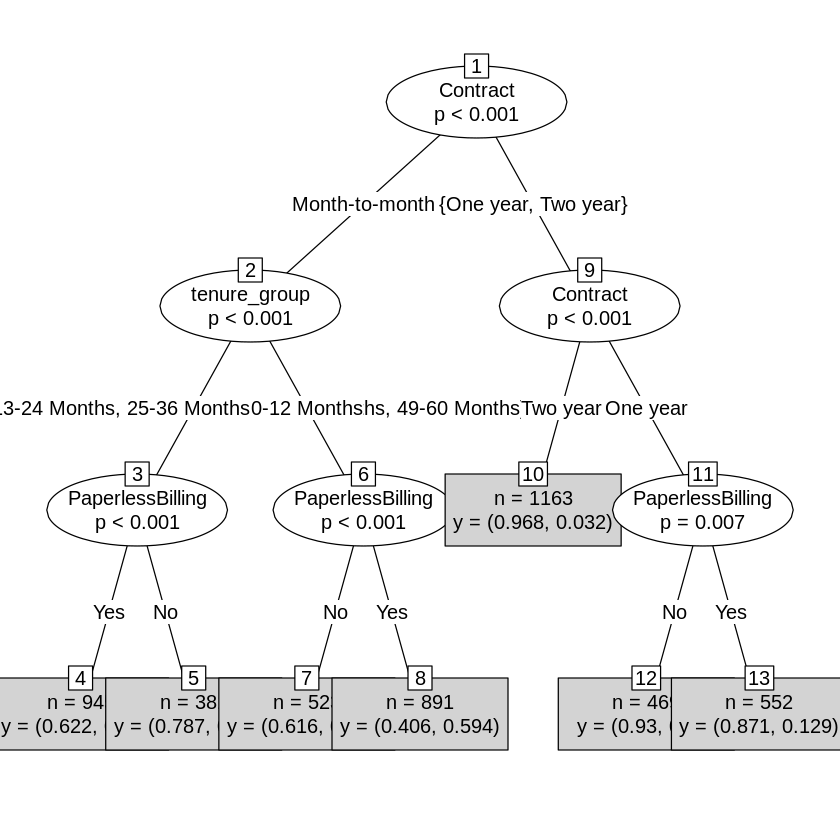

In [51]:
tree = ctree(Churn ~ Contract + tenure_group + PaperlessBilling, training)
plot(tree, type = 'simple')

In [52]:
pred_tree = predict(tree, testing)

In [53]:
print('Confusion Matrix')
table(Predicted = pred_tree, Actual = testing$Churn)

[1] "Confusion Matrix"


         Actual
Predicted    0    1
      No  1411  356
      Yes  137  204

In [54]:
p1 = predict(tree, training)
tab1 = table(Predicted = p1, Actual = training$Churn)
tab2 = table(Predicted = pred_tree, Actual = testing$Churn)
print(paste('Decision Tree Accuracy', sum(diag(tab2))/sum(tab2)))

[1] "Decision Tree Accuracy 0.766129032258065"


## Randon Forest Model

In [58]:
set.seed(2017)
rfModel = randomForest(Churn ~ ., data = training)
print(rfModel)


Call:
 randomForest(formula = Churn ~ ., data = training) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 4

        OOB estimate of  error rate: 21.79%
Confusion matrix:
      No Yes class.error
No  3226 389   0.1076072
Yes  684 625   0.5225363


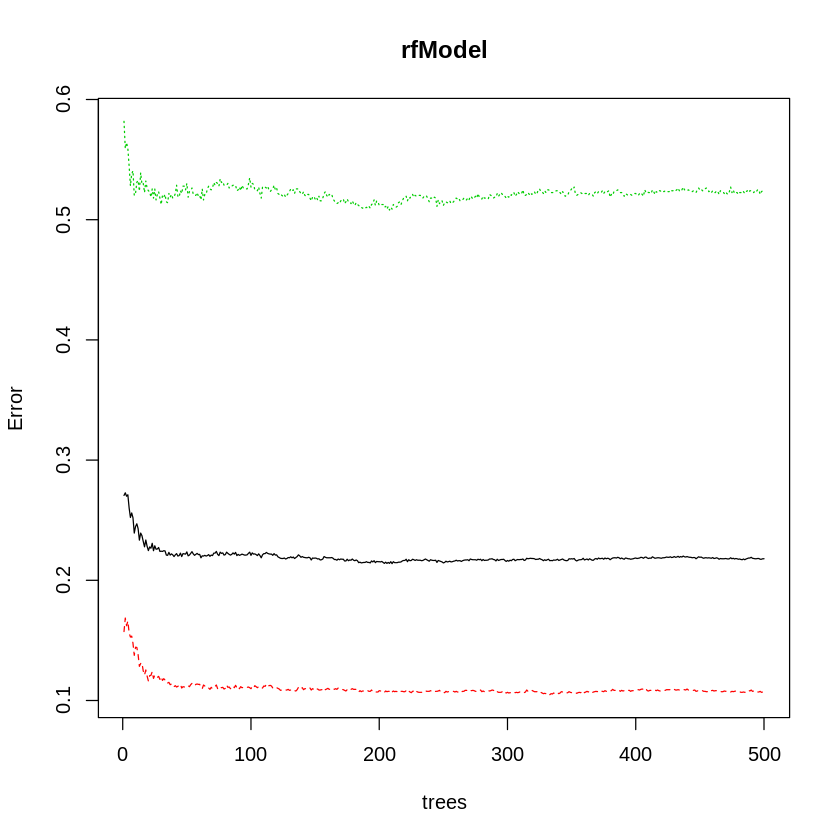

In [60]:
# The error rate drops until a limit. To get a better model we need to configure better parameters
plot(rfModel)

In [56]:
pred_rf = predict(rfModel, testing)

In [57]:
print('Confusion Matrix')
table(testing$Churn, pred_rf)

[1] "Confusion Matrix"


   pred_rf
      No  Yes
  0 1412  136
  1  302  258

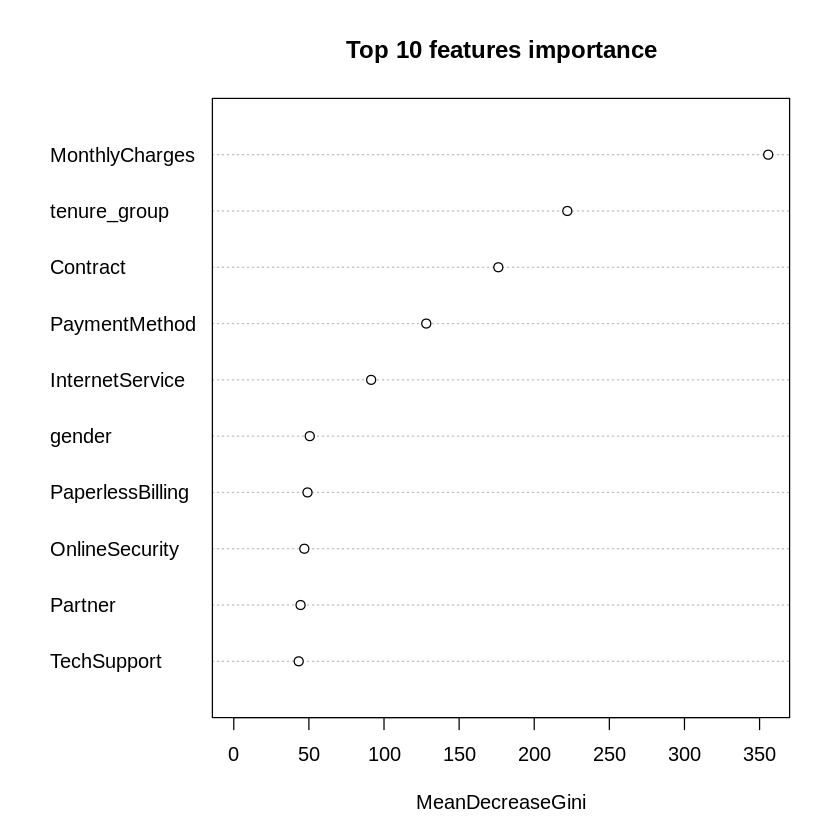

In [62]:
#?varImpPlot
varImpPlot(rfModel, sort = T, n.var = 10, main = 'Top 10 features importance')

## Making a report RMarkdown
On the R Studio, follow the menu File -> New File -> R Markdown
- Install the packages
- Give a title
- Choose the output format
- Click on OK button

This steps will create a template to make a report RMarkdown.

RMarkDown its like a jupyter-notebook